# Data Wrangling: WeRateDogs Twitter Data

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime 
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

## Gather

In [2]:
# Reading (twitter-archive-enhanced.csv) file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading and saving (Image predictoins.tsv) file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
# Query the Twitter API for each tweet's JSON data and store them a file called tweet_json.txt file.
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive.
count = 0
fails_dict = {}
start = timer()
if not os.path.isfile('tweet_json.txt'):
    # Save each tweet's returned JSON as a new line in a .txt file.
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit.
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass

end = timer()
print(end - start)
print(fails_dict)

0.000370554999989281
{}


In [5]:
# Read the created 'tweet_json.txt' file line by line.
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        
        # Append to list of dictionaries.
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})

api_df = pd.DataFrame(df_list)

## Assess

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [104]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
api_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


In [59]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [60]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [62]:
list(archive_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [63]:
list(image_predictions_df)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [64]:
list(api_df)

['favorite_count', 'retweet_count', 'tweet_id']

In [97]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [98]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [99]:
api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [103]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [139]:
archive_df.

957

In [1]:
archive_df.name + '   ' + archive_df.doggo

NameError: name 'archive_df' is not defined

###### Quality Aspects
#### a. `archive_df` Dataset
##### i. Data types(consistency issues):
- Some tweets are retweets and replies.
- Coulmns with almost all NaN values 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'.
- `tweet_id` is not in appropriate format
- 'timestamp' not in datetime fromat

##### ii. Completeness issues:
- Defected names in 'name' column.

##### iii. Accuracy issues:
- 'rating_numerator' column has suspected values.
- 'rating_denominator' column has wrong values.

#### b. `image_predictions_df` Dataset
##### i. Data types(consistency issues):

##### ii. Completeness issues:
- Some tweets don't have photos.


###### Tidiness
#### a. `archive_df` Dataset
- Values are column names 'doggo', 'floofer', 'pupper', 'puppo'.

#### b. `image_predictions_df` Dataset
- Values are column names 'p1', 'p2', 'p3', etc.. .

#### c. `api_df` Dataset
- `api_df` not in the same table with `archive_df`.

## Clean

In [6]:
# Make copies of all data frames to make modifications on them.
archive_clean = archive_df.copy()
image_clean = image_predictions_df.copy()
api_clean = api_df.copy()

### Tidiness

#### Values are column names 'doggo', 'floofer', 'pupper', 'puppo'.

##### Define
switch the coulmn headers to be values not variables using *pd.melt* inquiry

##### Code

In [7]:
# Create a funtion to select the dogs without known stage.
def stage(dog):
    if dog ['doggo'] == 'None' and dog ['floofer'] == 'None' and dog ['pupper'] == 'None' and dog ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

# Create a column that contains all unknown dog stage
archive_clean['unknown'] = archive_clean.apply(stage, axis=1)

# Now use melt method to create a new column dog stage.
archive_clean = pd.melt(archive_clean, id_vars =['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

# Clean and drop value column
archive_clean = archive_clean[archive_clean['value']!= 'None']
archive_clean = archive_clean.drop('value', axis=1)
archive_clean['dog_stage'] = archive_clean.dog_stage.replace('unknown', '')

##### Test

In [227]:
archive_clean.dog_stage.value_counts()

           1976
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

#### Values are column names 'p1', 'p2', 'p3', etc.. .

##### Define
Put all predictions in one column and also melt all corresponding values of confidence level and dog check.

##### Code

In [8]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']

image_clean.columns = cols

# Reshaping the dataframe
image_clean = pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

##### Test

In [82]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
5067,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,1,German_shepherd,0.817953,True
4236,770787852854652928,https://pbs.twimg.com/media/CrJjdZmXgAEWLSD.jpg,1,1,Bernese_mountain_dog,0.787812,True
412,668528771708952576,https://pbs.twimg.com/media/CUcXXpxWUAAUJ__.jpg,1,2,kuvasz,0.121607,True
2013,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,1,cocker_spaniel,0.901392,True
1193,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,3,golden_retriever,0.005689,True
5389,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,2,Tibetan_terrier,0.000046,True
5040,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,1,malamute,0.501159,True
4190,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,3,lakeside,0.048810,False
2857,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,2,Irish_terrier,0.027587,True
5116,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,2,Samoyed,0.201358,True


### Quality

#### Some tweets don't have photos

#### Define
Use `image_predictions` to remove tweets without photos in `archive_df` dataframe.

#### Code

In [9]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_clean.tweet_id.unique())

# Cleaning in action
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]

##### Test

In [13]:
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()

False

#### Some tweets are retweets and replies

##### Define
Use columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')  to shed the retweet and replies from our datasets and then will be dropped.

##### Code

In [14]:
# Extract the tweets that include data in the retweet_status_id and the replies.
retweet_entries = archive_clean.retweeted_status_id.notnull()
replies_entries = archive_clean.in_reply_to_status_id.notnull()

# Dropping the retweets and replies from the archive data set
archive_clean = archive_clean[~retweet_entries]
archive_clean = archive_clean[~replies_entries]

# Dropping the retweets and replies ids from the image prediction dataframe
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

##### Test

In [16]:
archive_clean.shape[0]

5913

#### Defected names in `name` coulmn

##### Define
Use replace method to remove None value from name column to eliminate confusing

##### Code

In [17]:
# Capturing name content
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

# Looping in each row to capture the right name from 'text' column
for index, row in archive_clean.iterrows():
    try:
        if row['name'] == "a":
            # Find name patterns from text column 'a'
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
        
        elif row['name'] == 'an':
            # Find name patterns from text column 'an'
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', c_name)
        
        elif row['name'] == 'None':
            # Find name patterns from text column to replace 'None'
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('None', c_name)
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan

##### Test

In [109]:
archive_clean.name.value_counts(dropna = False)

NaN           561
Charlie        11
Lucy           10
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Winston         8
the             7
Toby            7
Daisy           7
Lola            7
Koda            6
Jax             6
Bella           6
Bo              6
Stanley         6
Chester         5
Louis           5
Bailey          5
Milo            5
Buddy           5
Dave            5
Maggie          5
Scout           5
Leo             5
Rusty           5
Oscar           5
Zoey            4
             ... 
Chadrick        1
Dot             1
Ashleigh        1
Baloo           1
Fido            1
Canela          1
Fynn            1
Lacy            1
Pepe            1
Lilly           1
Noah            1
Barney          1
Aiden           1
Miley           1
Logan           1
Karma           1
Winifred        1
Franq           1
Ziva            1
Willem          1
Jessifer        1
Pepper          1
Acro            1
Sabertooth      1
Rover     

#### Coulmns with almost all NaN values 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'.

##### Define
The majority of the contents of these columns are NaN, no need for it now.

##### Code

In [18]:
# Drop the above mentioned columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [111]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo
108,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
121,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo


#### `timestamp` column not in the datetime format

##### Define
Using to_datetime method to modify timestamp type.

##### Code

In [19]:
# Convert timestamp column to datetime format
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

##### Test

In [17]:
archive_clean.timestamp

9       2017-07-26 15:59:51
43      2017-07-09 21:29:42
99      2017-06-09 00:02:31
108     2017-06-04 23:56:03
121     2017-05-30 16:49:31
172     2017-05-01 00:40:27
191     2017-04-22 18:31:02
200     2017-04-17 16:34:26
240     2017-03-28 00:07:32
248     2017-03-24 22:08:59
300     2017-03-01 01:42:39
318     2017-02-23 01:22:14
331     2017-02-18 17:00:10
339     2017-02-16 17:00:25
344     2017-02-16 01:04:13
345     2017-02-15 18:54:34
351     2017-02-14 02:02:51
362     2017-02-08 22:00:52
363     2017-02-08 17:00:26
372     2017-02-05 23:15:47
384     2017-02-02 01:01:21
385     2017-02-01 17:44:55
389     2017-01-31 17:06:32
391     2017-01-30 23:05:46
423     2017-01-18 17:07:18
426     2017-01-17 17:21:47
429     2017-01-16 21:32:06
440     2017-01-13 15:08:56
448     2017-01-11 02:21:57
449     2017-01-11 02:15:36
                ...        
11750   2015-11-17 00:24:19
11751   2015-11-17 00:06:54
11752   2015-11-16 23:23:41
11753   2015-11-16 21:54:18
11754   2015-11-16 2

#### 'rating_numerator' column has suspected values.

##### Define
'rating_numerator' column has suspected values needs to be fixed programatically

##### Code

In [20]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = archive_clean.rating_denominator[archive_clean.rating_numerator >= 40 ] / 10

# Performing the Calculations
archive_clean.loc[archive_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_clean.rating_numerator[archive_clean.rating_numerator >= 40]/dogs_count , 10]

##### Test

In [182]:
archive_clean.rating_denominator.value_counts()

10    1976
11       2
20       1
7        1
2        1
Name: rating_denominator, dtype: int64

#### 'rating_denominator' column has wrong values.

##### Define
Fix the remaining mistaken values of `rating_denominator` manually as they are a few.

##### Code

In [21]:
# Edit values when 'rating_ddenominator' equals 11
archive_clean.loc[archive_clean['rating_denominator'] == 11, 'rating_numerator']
archive_clean.loc[archive_clean['rating_numerator'] == 7, 'rating_denominator'] = 10
archive_clean.loc[archive_clean['rating_numerator'] == 9, 'rating_denominator'] = 10

# Edit values when 'rating_ddenominator' equals 20
archive_clean.loc[archive_clean['rating_denominator'] == 20, 'rating_numerator']
archive_clean.loc[archive_clean['rating_numerator'] == 4, 'rating_denominator'] = 10

# Edit values when 'rating_ddenominator' equals 7
archive_clean.loc[archive_clean['rating_denominator'] == 7, 'rating_numerator']
archive_clean.loc[archive_clean['rating_numerator'] == 24, 'rating_denominator'] = 10

# Edit values when 'rating_ddenominator' equals 2
archive_clean.loc[archive_clean['rating_denominator'] == 2, 'rating_numerator']
archive_clean.loc[archive_clean['rating_numerator'] == 1, 'rating_denominator'] = 10

##### Test

In [184]:
archive_clean.rating_denominator.value_counts()

10    1981
Name: rating_denominator, dtype: int64

#### `tweet_id` is not in appropriate format

##### Define
Convert `tweet_id` format to be object to avoid any mistaken mathematical operation on it.

##### Code

In [22]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
api_clean['tweet_id'] = api_clean['tweet_id'].astype(str)

##### Test

In [186]:
archive_clean.info()
image_clean.info()
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 9 to 11779
Data columns (total 9 columns):
tweet_id              1981 non-null object
timestamp             1981 non-null datetime64[ns]
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1981 non-null int64
name                  1420 non-null object
dog_stage             1981 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 234.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null object
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_level    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
breed               6225 non-null bool
dtypes: bool(1), float64(

#### `api_clean` dataset is separated from `archive_clean` dataset.

##### Define
Use .merge method to add `api_clean` dataset to `archive_clean`.

##### Code

In [23]:
# Merge all dataframes in one.
twitter_archive_master = archive_clean.merge(api_clean, how = 'left', on = 'tweet_id')

##### Test

In [188]:
twitter_archive_master.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


## Store

In [24]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
image_clean.to_csv('image_predictions.csv', index=False)

## Analysis and Visualization

In [42]:
master_df = pd.read_csv('twitter_archive_master.csv')
image_df = pd.read_csv('image_predictions.csv')

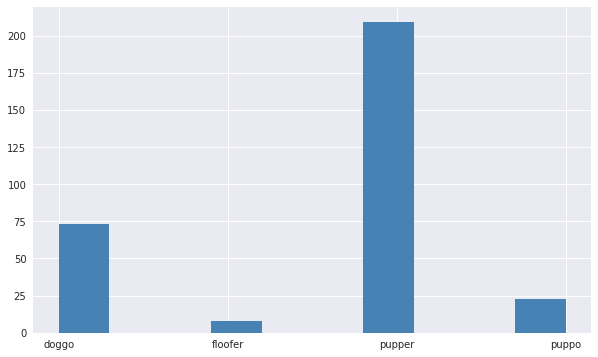

In [27]:
# Plot histograms for dog_stage
master_df['dog_stage'].hist(color='steelblue')

# Adjusting plot area
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10, 6)})

plt.show()

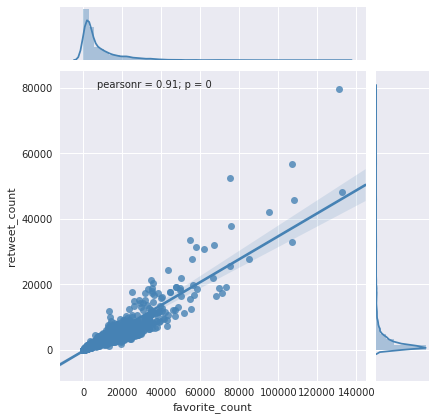

In [63]:
# Plot scatterplot between favorite and retweet counts
x = master_df['favorite_count']
y = master_df['retweet_count']

# Adjusting plot area
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,10)})

# Plot the dots
sns.set_style(style="darkgrid")

fav_ret = sns.jointplot(x="favorite_count", y="retweet_count", data=master_df,
                  kind="reg", truncate=False, color="steelblue")

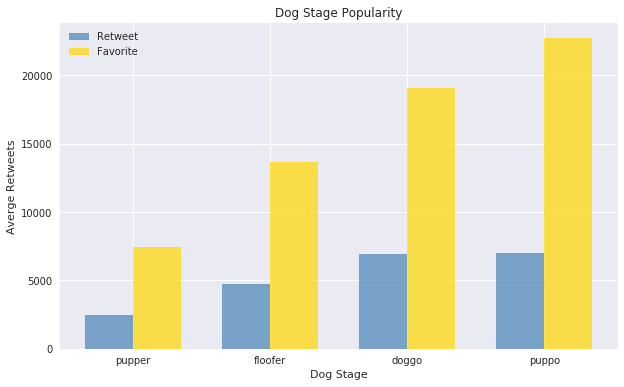

In [29]:
# Grouping dog_stage to calculate average stage for each
avg_retweet = master_df.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)[12::-1]
avg_favorite = master_df.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)[12::-1]

ind = np.arange(len(avg_retweet))  # the x locations for the groups
width = 0.35       # the width of the bars

# Adjusting plot area
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})

# Plot bar chart depicts average dog_stage count
retweet_bars = plt.bar(ind, avg_retweet, width, color='steelblue', alpha=.7, label='Retweet')
favorite_bars = plt.bar(ind + width, avg_favorite, width, color='gold', alpha=.7, label='Favorite')

# title and labels
plt.ylabel('Averge Retweets')
plt.xlabel('Dog Stage')
plt.title('Dog Stage Popularity')
locations = ind + width / 2  # xtick locations
labels = ['pupper', 'floofer', 'doggo', 'puppo']
plt.xticks(locations, labels)

# Legend
plt.legend()
plt.show()

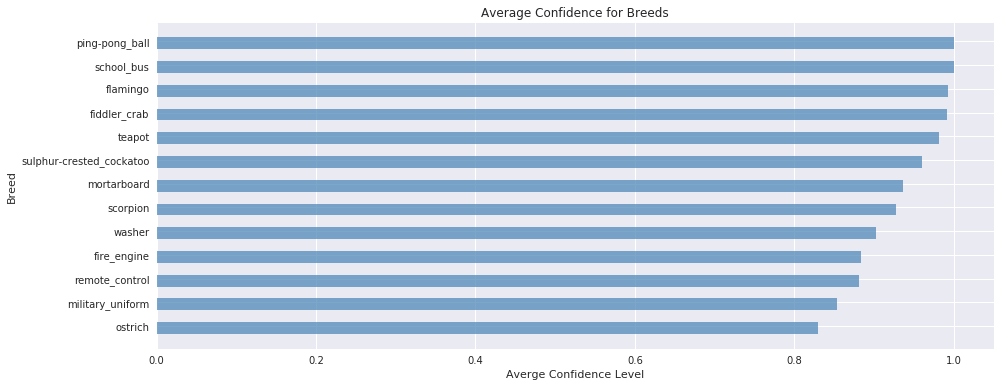

In [30]:
# Grouping breeds to calculate average confidence.
avg_conf = image_df.groupby(['prediction']).confidence.mean().sort_values(ascending=False)[12::-1]

ind = np.arange(len(avg_conf))  # the x locations for the groups
width = 0.5       # the width of the bars


# Adjusting plot area
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(15,6)})

# Plot bar chart depicts average confidence for every breed
conf_bars = plt.barh(ind, avg_conf, width, align='center', color='steelblue', alpha=.7, label='Confidence')

# title and labels
plt.ylabel('Breed')
plt.xlabel('Averge Confidence Level')
plt.title('Average Confidence for Breeds')
labels = ['ostrich', 'military_uniform', 'remote_control', 'fire_engine', 'washer', 'scorpion', 'mortarboard',
         'sulphur-crested_cockatoo', 'teapot', 'fiddler_crab', 'flamingo', 'school_bus', 'ping-pong_ball']
location = ind + width / 6
plt.yticks(location, labels)

plt.show()

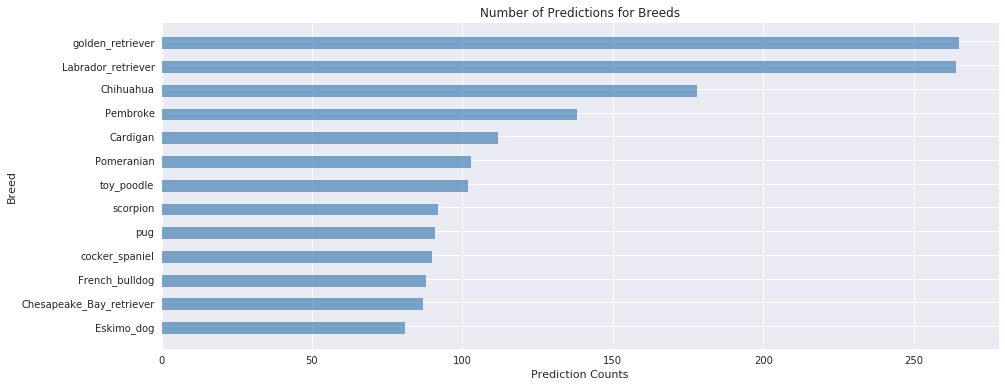

In [31]:
# Grouping breeds to calculate most pre
most_pred = image_df.prediction.value_counts().sort_values(ascending=False)[12::-1]

ind = np.arange(len(most_pred))  # the x locations for the groups
width = 0.5       # the width of the bars


# Adjusting plot area
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(15,6)})

# Plot bar chart depicts average confidence for every breed
conf_bars = plt.barh(ind, most_pred, width, align='center', color='steelblue', alpha=.7, label='Confidence')

# title and labels
plt.ylabel('Breed')
plt.xlabel('Prediction Counts')
plt.title('Number of Predictions for Breeds')
labels = ['Eskimo_dog', 'Chesapeake_Bay_retriever', 'French_bulldog', 'cocker_spaniel', 'pug', 'scorpion', 'toy_poodle',
         'Pomeranian', 'Cardigan', 'Pembroke', 'Chihuahua', 'Labrador_retriever', 'golden_retriever']
location = ind + width / 6
plt.yticks(location, labels)

plt.show()